In [1]:
!pip install -U pip
!pip install ultralytics roboflow supervision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 83.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 87.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 136.3 MB/s  0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [ultralytics]


In [2]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p /content/drive/MyDrive/watermeter_project


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!unzip -q /WaterMeterAMRV2.v1i.yolov11.zip -d /content/watermeter_dataset
!ls -la /content/watermeter_dataset
!sed -n '1,200p' /content/watermeter_dataset/data.yaml  || true


total 32
drwxr-xr-x 5 root root 4096 Nov 13 11:15 .
drwxr-xr-x 1 root root 4096 Nov 13 11:15 ..
-rw-r--r-- 1 root root  337 Oct 10 08:55 data.yaml
-rw-r--r-- 1 root root  152 Oct 10 08:55 README.dataset.txt
-rw-r--r-- 1 root root 1222 Oct 10 08:55 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Oct 10 08:55 test
drwxr-xr-x 4 root root 4096 Oct 10 08:55 train
drwxr-xr-x 4 root root 4096 Oct 10 08:55 valid
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 12
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'counter', 'liters']

roboflow:
  workspace: koer3741-gmail-com
  project: watermeteramrv2
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/koer3741-gmail-com/watermeteramrv2/dataset/1

In [8]:
import yaml, os

def find_data_yaml(root="/content"):
    for dirpath, dirnames, filenames in os.walk(root):
        if "data.yaml" in filenames:
            return os.path.join(dirpath, "data.yaml")
    return None

data_yaml_path = find_data_yaml("/content")
print("Found data.yaml:", data_yaml_path)

if data_yaml_path:
    with open(data_yaml_path, "r") as f:
        print(f.read())
else:
    print("data.yaml не найден — укажи путь вручную")


Found data.yaml: /content/watermeter_dataset/data.yaml
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 12
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'counter', 'liters']

roboflow:
  workspace: koer3741-gmail-com
  project: watermeteramrv2
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/koer3741-gmail-com/watermeteramrv2/dataset/1


In [26]:
path_to_data_yaml = data_yaml_path or "/content/WaterMeterAMRV2.v1i.yolov11/data.yaml"

from ultralytics import YOLO
import os, sys

model_name_primary = "yolo11m.pt"
model_name_fallback = "yolo11n.pt"

try:
    model = YOLO(model_name_primary)
    print("Loaded model:", model_name_primary)
except Exception as e:
    print(f"Не удалось загрузить {model_name_primary}: {e}\nПопробуем {model_name_fallback}...")
    model = YOLO(model_name_fallback)
    print("Loaded model:", model_name_fallback)

EPOCHS = 50
BATCH = 16
IMGSZ = 640
EXPERIMENT_NAME = "watermeter_yolo11m"

results = model.train(data=path_to_data_yaml,
                      epochs=EPOCHS,
                      imgsz=IMGSZ,
                      batch=BATCH,
                      name=EXPERIMENT_NAME,
                      project="/content/drive/MyDrive/watermeter_project")
print("Training finished. Results object:", results)


Loaded model: yolo11m.pt
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/watermeter_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=watermeter_yolo11m3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

KeyboardInterrupt: 

In [19]:
from ultralytics import YOLO
path_to_data_yaml = data_yaml_path or "/content/WaterMeterAMRV2.v1i.yolov11/data.yaml"

weights_path = f"/content/drive/MyDrive/watermeter_yolo11m2/weights/best.pt"
import os
if not os.path.exists(weights_path):
    import glob
    cand = glob.glob("/content/runs/train/*/weights/best.pt") + glob.glob("/content/drive/MyDrive/watermeter_project/*/weights/best.pt")
    weights_path = cand[0] if cand else None

print("Weights to validate:", weights_path)

if weights_path:
    model = YOLO(weights_path)
    metrics = model.val(data=path_to_data_yaml, split="test")  # split может быть 'val' или 'test' в data.yaml
    print("Validation metrics:", metrics)
else:
    print("Веса не найдены — убедись, что обучение завершилось и best.pt существует")


Weights to validate: /content/drive/MyDrive/watermeter_project/watermeter_yolo11m2/weights/best.pt
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,039,284 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1167.9±350.9 MB/s, size: 49.7 KB)
val: Scanning /content/watermeter_dataset/test/labels.cache... 389 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 389/389 452.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 2.0it/s 12.2s
                   all        389       2105      0.965      0.951      0.973      0.616
                     0        162        213      0.915      0.907      0.946      0.539
                     1        108        153      0.923      0.935      0.964       0.58
                     2         87         90       0.96      0.978      0.978      0.569
                     3


0: 640x640 1 0, 2 2s, 1 5, 1 9, 1 counter, 1 liters, 36.9ms
Speed: 2.1ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


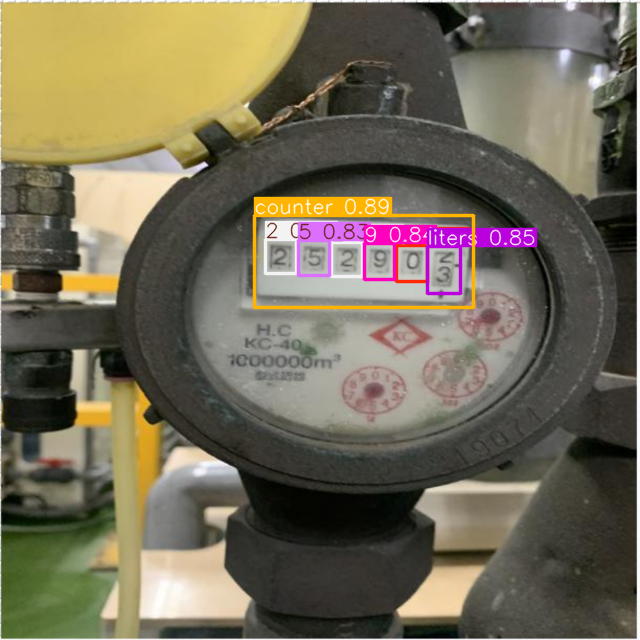

tensor([[254.9146, 215.6295, 473.0639, 307.1847,   0.8909,  10.0000],
        [427.2786, 246.2912, 460.4287, 293.1766,   0.8452,  11.0000],
        [364.3181, 243.3836, 394.9291, 279.5813,   0.8427,   9.0000],
        [298.1723, 240.5833, 329.5530, 275.9720,   0.8295,   5.0000],
        [265.3412, 239.6604, 296.0730, 273.4600,   0.8293,   2.0000],
        [331.3122, 242.6616, 362.3577, 276.7952,   0.8153,   2.0000],
        [396.9951, 245.7336, 427.2407, 281.2375,   0.7793,   0.0000]], device='cuda:0')
Используемые веса: /content/drive/MyDrive/watermeter_project/watermeter_yolo11m2/weights/best.pt


In [25]:
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import os
from IPython.display import display, Image as IPyImage

if weights_path and os.path.exists(weights_path):
    model = YOLO(weights_path)
else:
    model = YOLO(model_name_fallback)
    print("Используем fallback модель для демонстрации")

def load_image_from_path(image_path):
    """Загружает изображение с локального пути"""
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Файл не найден: {image_path}")

    img = Image.open(image_path).convert("RGB")
    return np.array(img)  # RGB

def predict_and_show(image_path, conf=0.1, imgsz=640, save_path="/content/pred_result.jpg"):
    """Предсказание и отображение результата для локального изображения"""
    img = load_image_from_path(image_path)
    img = cv2.resize(img, (imgsz, imgsz))  # масштабируем
    results = model.predict(source=img, imgsz=imgsz, conf=conf)
    annotated = results[0].plot()
    display(Image.fromarray(annotated))
    print(results[0].boxes.data)

test_photo = "/test_photo.png"
predict_and_show(test_photo, conf=0.3, imgsz=640, save_path="/content/drive/MyDrive/watermeter_project/pred_example.jpg")
print("Используемые веса:", weights_path)

In [ ]:
# Ячейка 8 — пример сохранения best.pt и логов уже сделано через project path.
# Если хочешь скачать weights локально:
from google.colab import files
if weights_path and os.path.exists(weights_path):
    files.download(weights_path)
else:
    print("Веса не найдены для скачивания.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>